In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#SCREENSHOT OF RUNNING SCENE IN FACTORY IO

![title](images/Conveyor.PNG)

<h1>Testing the ideal range obatined on a corrupted data<h1>

In [3]:
#Importing the csv file from factory io

#Commenting out block of code for local machine usage
#data = pd.read_csv('C:/Users/a.sethu/Desktop/Python/moving2.csv')
#df = pd.DataFrame(data)

#Importing the csv file created in factory io
#File currently contains 6 Columns and 682,211 Rows
data = pd.read_csv('data/moving2.zip')
df = pd.DataFrame(data)

In [4]:
#Importing the csv file from factory io

#Commenting out block of code for local machine usage
#data = pd.read_csv('C:/Users/a.sethu/Desktop/Python/normal.csv')
#df = pd.DataFrame(data)

#Importing the csv file created in factory io
#File currently contains 6 Columns and 682,211 Rows
import zipfile
from zipfile import ZipFile
file_name = "data/moving2.zip"
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()

File Name                                             Modified             Size
moving2.csv                                    2021-03-11 16:08:44     35879985


In [5]:
#Subseting all Light Array Emitter data
filteredLAE = df[df[' Name']=='Light Array Emitter 1 (Value)']
#using a copy to prevent index warning
filteredLAE = filteredLAE.copy()
#converting the current value column to numeric
filteredLAE[' Current Value'] = pd.to_numeric(filteredLAE[' Current Value'])

In [6]:
#using a copy to prevent index warning
filteredLAE = filteredLAE.copy()
filteredLAE[' Sensor Value Difference'] = filteredLAE[' Current Value'].diff()
filteredLAE

,Sensor/Actuator,Data Type,Name,Address,Current Value,Time Elapsed,Sensor Value Difference
5,Sensor,Int,Light Array Emitter 1 (Value),0,0,6.783351,NaN
22,Sensor,Int,Light Array Emitter 1 (Value),0,0,6.883351,0.0
39,Sensor,Int,Light Array Emitter 1 (Value),0,0,6.975019,0.0
56,Sensor,Int,Light Array Emitter 1 (Value),0,0,7.066686,0.0
73,Sensor,Int,Light Array Emitter 1 (Value),0,0,7.166686,0.0
...,...,...,...,...,...,...,...
682130,Sensor,Int,Light Array Emitter 1 (Value),0,192,4014.250000,0.0
682147,Sensor,Int,Light Array Emitter 1 (Value),0,192,4014.341000,0.0
682164,Sensor,Int,Light Array Emitter 1 (Value),0,192,4014.457000,0.0
682181,Sensor,Int,Light Array Emitter 1 (Value),0,192,4014.548000,0.0


In [7]:
#Filtering sensor trigger data points from the data by removing 
#all all data with current value = 0
filteredLAE = filteredLAE[filteredLAE[' Sensor Value Difference'] != 0]
filteredLAE = filteredLAE[filteredLAE[' Current Value']!=128 ]
filteredLAE = filteredLAE[filteredLAE[' Current Value']!=64 ]
#Dropping al NaN values
filteredLAE.dropna(subset = [' Sensor Value Difference'], inplace=True)
filteredLAE

,Sensor/Actuator,Data Type,Name,Address,Current Value,Time Elapsed,Sensor Value Difference
1909,Sensor,Int,Light Array Emitter 1 (Value),0,192,17.96656,64.0
2266,Sensor,Int,Light Array Emitter 1 (Value),0,0,20.07486,-192.0
2538,Sensor,Int,Light Array Emitter 1 (Value),0,192,21.68317,192.0
2912,Sensor,Int,Light Array Emitter 1 (Value),0,0,23.88313,-192.0
3694,Sensor,Int,Light Array Emitter 1 (Value),0,192,28.46640,128.0
...,...,...,...,...,...,...,...
679869,Sensor,Int,Light Array Emitter 1 (Value),0,192,4000.99300,192.0
680226,Sensor,Int,Light Array Emitter 1 (Value),0,0,4003.09300,-192.0
681076,Sensor,Int,Light Array Emitter 1 (Value),0,192,4008.08200,192.0
681450,Sensor,Int,Light Array Emitter 1 (Value),0,0,4010.25700,-192.0


In [8]:
filteredLAE[filteredLAE[' Sensor Value Difference'] > 0]
filteredLAE['Trigger Status']="Off"
filteredLAE['Trigger Status'] = filteredLAE.apply(lambda x: 'On' if x[' Sensor Value Difference']>0 else 'Off',axis=1)

In [9]:
filteredLAE['Trigger Interval'] = filteredLAE[" Time Elapsed"].diff(1)

In [10]:
preprocessedDF = filteredLAE[filteredLAE['Trigger Status']=='On']

In [11]:
#using a copy to prevent index warning
preprocessedDF = preprocessedDF.copy()
preprocessedDF['Trigger Interval'] = preprocessedDF[" Time Elapsed"].diff(1)
preprocessedDF.dropna(subset = ['Trigger Interval'], inplace=True)
preprocessedDF

,Sensor/Actuator,Data Type,Name,Address,Current Value,Time Elapsed,Sensor Value Difference,Trigger Status,Trigger Interval
2538,Sensor,Int,Light Array Emitter 1 (Value),0,192,21.68317,192.0,On,3.71661
3694,Sensor,Int,Light Array Emitter 1 (Value),0,192,28.46640,128.0,On,6.78323
4731,Sensor,Int,Light Array Emitter 1 (Value),0,192,34.56642,192.0,On,6.10002
6312,Sensor,Int,Light Array Emitter 1 (Value),0,192,43.86673,192.0,On,9.30031
7094,Sensor,Int,Light Array Emitter 1 (Value),0,192,48.47523,192.0,On,4.60850
...,...,...,...,...,...,...,...,...,...
678611,Sensor,Int,Light Array Emitter 1 (Value),0,192,3993.63800,192.0,On,6.09300
679393,Sensor,Int,Light Array Emitter 1 (Value),0,192,3998.21200,192.0,On,4.57400
679869,Sensor,Int,Light Array Emitter 1 (Value),0,192,4000.99300,192.0,On,2.78100
681076,Sensor,Int,Light Array Emitter 1 (Value),0,192,4008.08200,192.0,On,7.08900


([], [])

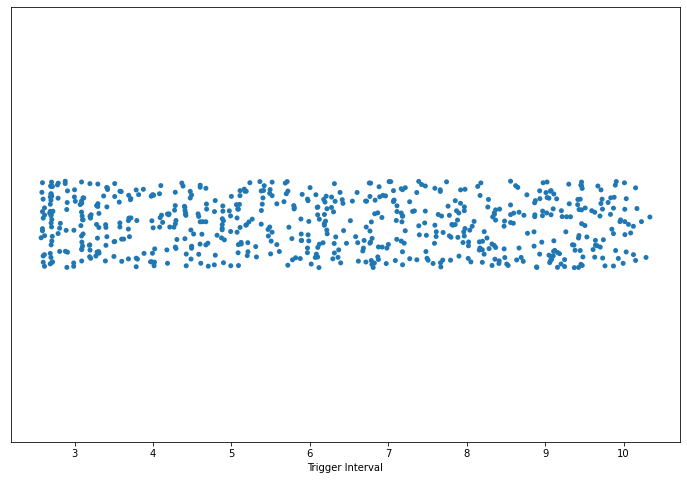

In [12]:
import seaborn as sns
preprocessedDF=preprocessedDF.reset_index(drop=True)
plt.figure(figsize=(12,8)) #Plotting the data points on the plot
sns.stripplot(x='Trigger Interval',data = preprocessedDF,jitter= True,edgecolor = 'None')
sns.despine
locs,labels = plt.xticks()
plt.yticks([])

<h1>Loading the JNOB(Jenks Natural Optimzation Breaks) obatined from ideal parameters<h1>

In [13]:
import jenkspy
#Finding the breaks using the Jenks natural breaks optimzation method
# load the model from disk
import pickle
breaks = pickle.load(open('data/finalized_model.sav', 'rb'))

In [14]:
breaks

[4.515600000000006, 5.8250000000000455]

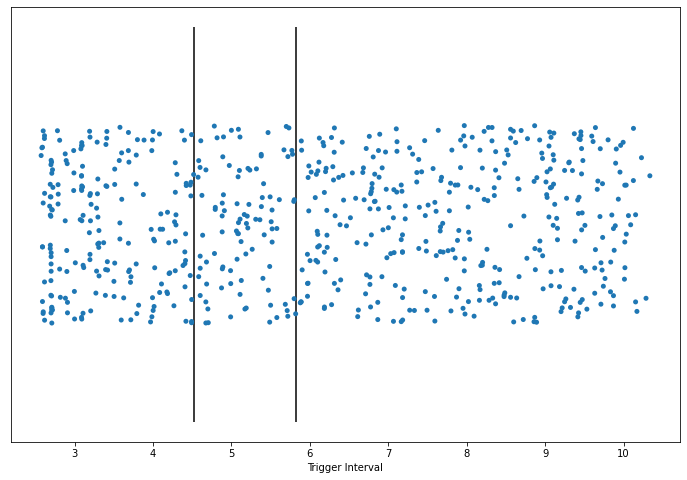

In [15]:
#seaborn library for plotting
import seaborn as sns
plt.figure(figsize=(12,8)) #Plotting the data points on the plot
sns.stripplot(x='Trigger Interval',data = preprocessedDF,jitter= True,edgecolor = 'None')
sns.despine
locs,labels = plt.xticks()
plt.yticks([])
#Drawing vertical lines usng the data points as x values
for b in breaks:
    plt.vlines(b,ymin= -0.2,ymax=0.2,color='k')

<b><i>According to the results obtained with ideal paramters it was inferred that the ideal range lies between 4.5 to 5.8. Taking this into account the valid data points in the above case would be those that lies in the center of the plot</i></b>

In [16]:
results = preprocessedDF.copy()
results['Box Interval level'] = 'Normal'
results['Box Interval level'] = results.apply(lambda x: 'Low' if x['Trigger Interval']<breaks[0] else x['Box Interval level'],axis=1)
results['Box Interval level'] = results.apply(lambda x: 'High' if x['Trigger Interval']>breaks[1] else x['Box Interval level'],axis=1)


In [17]:
results

,Sensor/Actuator,Data Type,Name,Address,Current Value,Time Elapsed,Sensor Value Difference,Trigger Status,Trigger Interval,Box Interval level
0,Sensor,Int,Light Array Emitter 1 (Value),0,192,21.68317,192.0,On,3.71661,Low
1,Sensor,Int,Light Array Emitter 1 (Value),0,192,28.46640,128.0,On,6.78323,High
2,Sensor,Int,Light Array Emitter 1 (Value),0,192,34.56642,192.0,On,6.10002,High
3,Sensor,Int,Light Array Emitter 1 (Value),0,192,43.86673,192.0,On,9.30031,High
4,Sensor,Int,Light Array Emitter 1 (Value),0,192,48.47523,192.0,On,4.60850,Normal
...,...,...,...,...,...,...,...,...,...,...
643,Sensor,Int,Light Array Emitter 1 (Value),0,192,3993.63800,192.0,On,6.09300,High
644,Sensor,Int,Light Array Emitter 1 (Value),0,192,3998.21200,192.0,On,4.57400,Normal
645,Sensor,Int,Light Array Emitter 1 (Value),0,192,4000.99300,192.0,On,2.78100,Low
646,Sensor,Int,Light Array Emitter 1 (Value),0,192,4008.08200,192.0,On,7.08900,High
